<a href="https://colab.research.google.com/github/adamnaemman/assignment/blob/main/IS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 1 Group H

In [ ]:
# This cell imports the necessary libraries for data manipulation, visualization, and machine learning.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [ ]:
# This cell downloads the 'fruit-classification' dataset from KaggleHub and identifies the path to the CSV file within the downloaded dataset.
path = kagglehub.dataset_download("pranavkapratwar/fruit-classification")
print("Path to dataset files:", path)

for file in os.listdir(path):
    if file.endswith(".csv"):
        dataset_path = os.path.join(path, file)
        break
print("Using dataset file:", dataset_path)

100%|██████████| 82.2k/82.2k [00:00<00:00, 53.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/pranavkapratwar/fruit-classification/versions/1
Using dataset file: /root/.cache/kagglehub/datasets/pranavkapratwar/fruit-classification/versions/1/fruit_classification_dataset.csv


In [ ]:
# This cell reads the identified CSV file into a pandas DataFrame and then displays the first 5 rows and a summary of its structure (data types, non-null counts).
df = pd.read_csv(dataset_path)
print("Dataset loaded successfully.")
print(df.head())
print(df.info())

Dataset loaded successfully.
   size (cm)  shape  weight (g)  avg_price (₹)   color  taste     fruit_name
0       25.4  round      3089.2          137.1   green  sweet     watermelon
1       24.6  round      3283.9          163.8   green  sweet     watermelon
2        7.8  round       319.0           91.3   green  sweet  custard apple
3       20.0   oval      1607.0           85.7  orange  sweet         papaya
4       10.2   long       131.5           37.8  yellow  sweet         banana
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   size (cm)      10000 non-null  float64
 1   shape          10000 non-null  object 
 2   weight (g)     10000 non-null  float64
 3   avg_price (₹)  10000 non-null  float64
 4   color          10000 non-null  object 
 5   taste          10000 non-null  object 
 6   fruit_name     10000 non-null  object 
dtypes

In [ ]:
# This cell performs label encoding on the specified categorical columns ('shape', 'color', 'taste') to convert them into numerical representations, which is required for many machine learning algorithms.

from sklearn.preprocessing import LabelEncoder, StandardScaler
categorical_cols = ['shape', 'color', 'taste']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# This cell encodes the target variable ('fruit_name') into numerical labels using LabelEncoder, making it suitable for classification models, and then displays the updated DataFrame head.

target_le = LabelEncoder()
df['fruit_name'] = target_le.fit_transform(df['fruit_name'])
print(df.head())

   size (cm)  shape  weight (g)  avg_price (₹)  color  taste  fruit_name
0       25.4      2      3089.2          137.1      2      1          19
1       24.6      2      3283.9          163.8      2      1          19
2        7.8      2       319.0           91.3      2      1           5
3       20.0      1      1607.0           85.7      3      1          13
4       10.2      0       131.5           37.8      7      1           1


In [ ]:
# This cell separates the dataset into features (X) by dropping the 'fruit_name' column and the target variable (Y) containing only 'fruit_name'.
target_column = 'fruit_name'

X = df.drop(target_column, axis=1)
Y = df[target_column]

In [ ]:
# This cell splits the feature (X) and target (Y) data into training and testing sets, with 33% of the data reserved for testing, ensuring a consistent split using a random state.
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size = 0.33, random_state = 42
)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((6700, 6), (3300, 6), (6700,), (3300,))

In [ ]:
# This cell initializes a Decision Tree Classifier and trains it using the training data (X_train, Y_train).
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier(criterion = 'gini')
treemodel.fit(X_train, Y_train)

DecisionTreeClassifier()

[Text(0.44047619047619047, 0.9615384615384616, 'x[4] <= 1.5\ngini = 0.95\nsamples = 6700\nvalue = [324, 331, 336, 335, 325, 346, 342, 317, 339, 345\n341, 332, 338, 344, 355, 360, 315, 354, 291, 330]'),
 Text(0.19047619047619047, 0.8846153846153846, 'x[2] <= 581.25\ngini = 0.75\nsamples = 1366\nvalue = [0, 0, 336, 0, 325, 0, 0, 0, 0, 345, 0, 0, 0\n0, 0, 360, 0, 0, 0, 0]'),
 Text(0.09523809523809523, 0.8076923076923077, 'x[2] <= 36.5\ngini = 0.5\nsamples = 681\nvalue = [0, 0, 336, 0, 0, 0, 0, 0, 0, 345, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0]'),
 Text(0.047619047619047616, 0.7307692307692307, 'gini = 0.0\nsamples = 336\nvalue = [0, 0, 336, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0]'),
 Text(0.14285714285714285, 0.7307692307692307, 'gini = 0.0\nsamples = 345\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 345, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0]'),
 Text(0.2857142857142857, 0.8076923076923077, 'x[1] <= 1.5\ngini = 0.499\nsamples = 685\nvalue = [0, 0, 0, 0, 325, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 360, 0, 0, 0, 0]

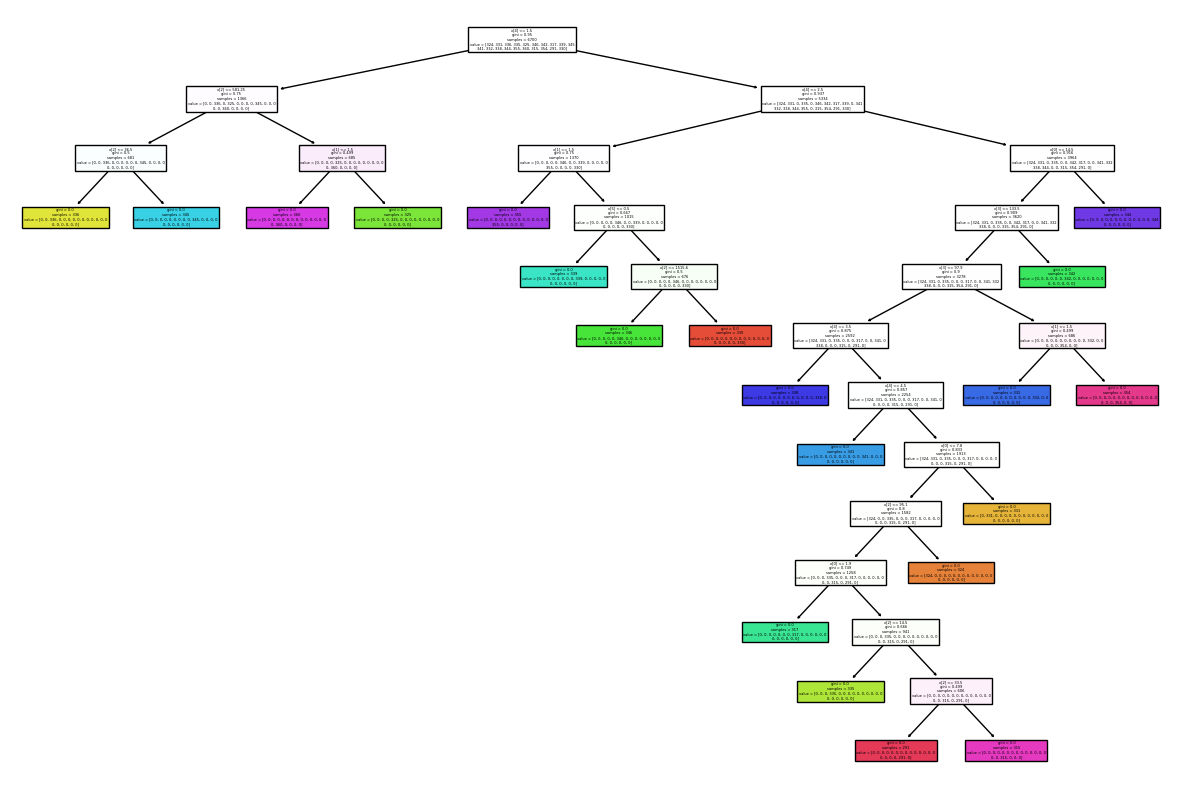

In [ ]:
# This cell visualizes the trained Decision Tree model, providing a graphical representation of the decision-making process.
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [ ]:
# This cell uses the trained Decision Tree model to make predictions on the test set (X_test) and then displays the predicted labels.
y_pred=treemodel.predict(X_test)

y_pred

array([17,  0, 17, ..., 18,  3, 11])

In [ ]:
# This cell calculates and prints the accuracy score by comparing the predicted labels (y_pred) with the actual labels (Y_test), indicating the model's overall performance.
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_pred, Y_test)
print(f"Accuracy score: {score}")

Accuracy score: 1.0


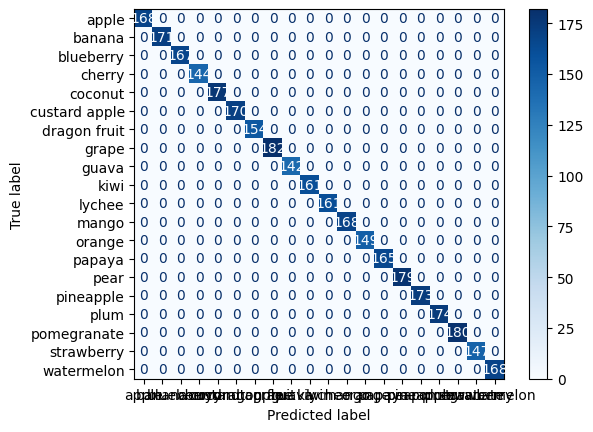

In [ ]:
# This cell generates and displays a confusion matrix to evaluate the performance of the classification model, showing the counts of true positive, true negative, false positive, and false negative predictions.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_le.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')

/tmp/ipython-input-3785948617.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='fruit_name', data=df, palette='viridis')
/tmp/ipython-input-3785948617.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(target_le.classes_, rotation=90)


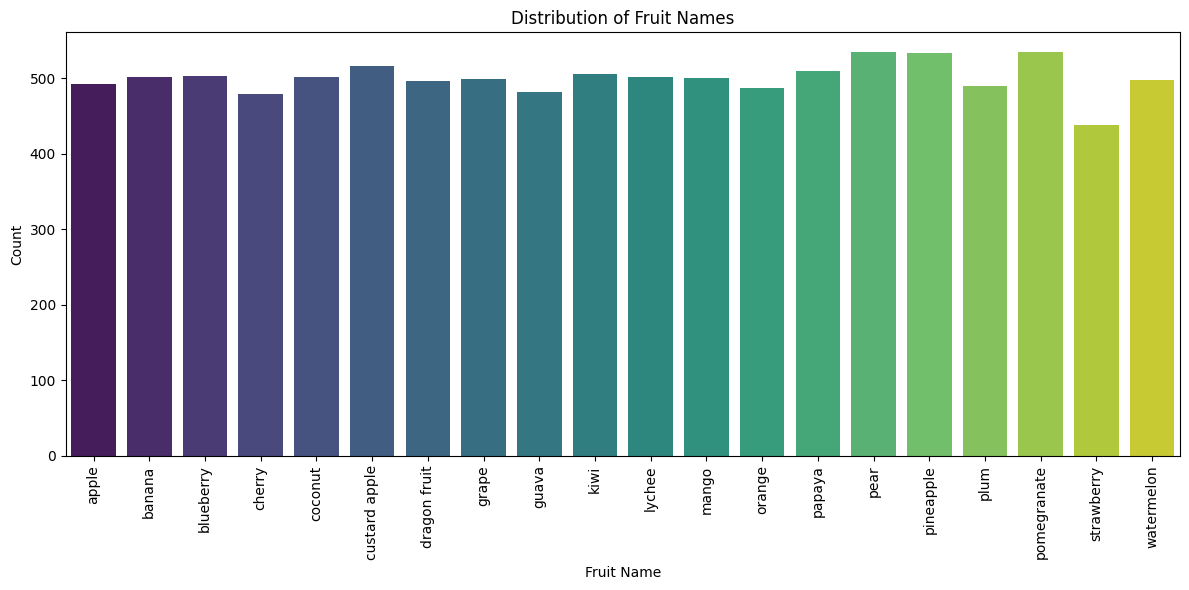

In [ ]:
# Countplot for fruit_name for distribution

plt.figure(figsize=(12, 6))
# Use the original DataFrame 'df' which still has the encoded 'fruit_name'
ax = sns.countplot(x='fruit_name', data=df, palette='viridis')
plt.title('Distribution of Fruit Names')
plt.xlabel('Fruit Name')
plt.ylabel('Count')

# Get the actual string names from the 'target_le' encoder
ax.set_xticklabels(target_le.classes_, rotation=90)

plt.tight_layout()
plt.show()

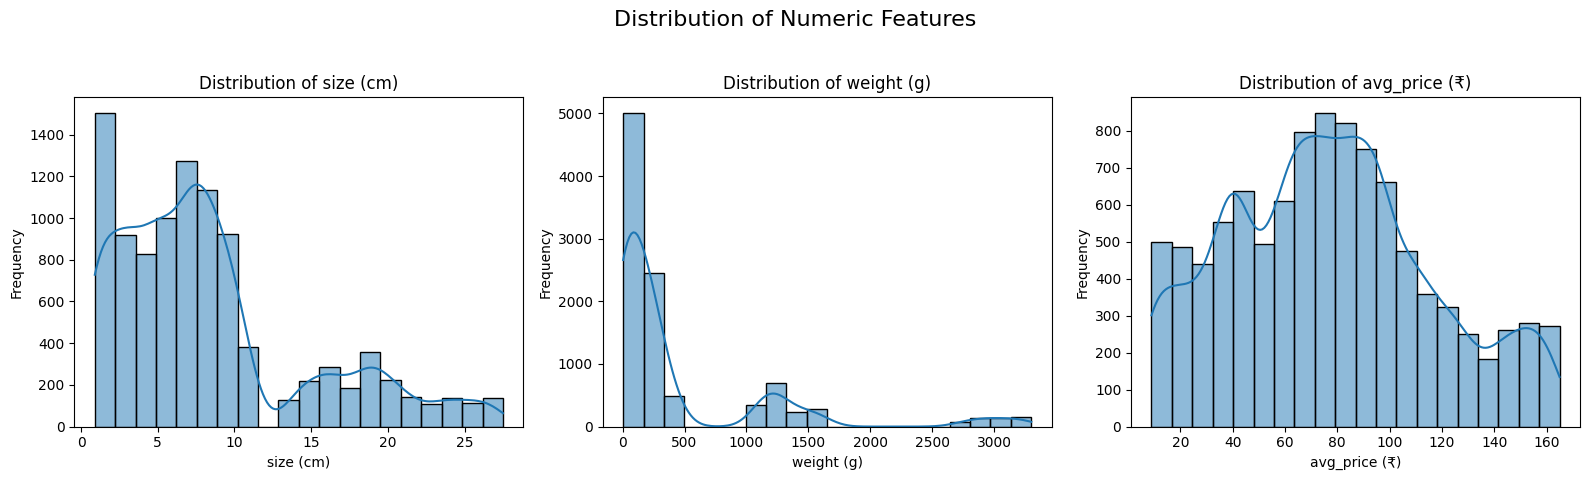

In [ ]:
# Histogram to check for frequency for numeric data (size, weight and avg_price)

numeric_cols = ['size (cm)', 'weight (g)', 'avg_price (₹)']

plt.figure(figsize=(16, 5))
plt.suptitle('Distribution of Numeric Features', fontsize=16)

for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i + 1)

    # Create a histogram
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
# Classification Report (performance summary to show precision)
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred, target_names=target_le.classes_))

               precision    recall  f1-score   support

        apple       1.00      1.00      1.00       168
       banana       1.00      1.00      1.00       171
    blueberry       1.00      1.00      1.00       167
       cherry       1.00      1.00      1.00       144
      coconut       1.00      1.00      1.00       177
custard apple       1.00      1.00      1.00       170
 dragon fruit       1.00      1.00      1.00       154
        grape       1.00      1.00      1.00       182
        guava       1.00      1.00      1.00       142
         kiwi       1.00      1.00      1.00       161
       lychee       1.00      1.00      1.00       161
        mango       1.00      1.00      1.00       168
       orange       1.00      1.00      1.00       149
       papaya       1.00      1.00      1.00       165
         pear       1.00      1.00      1.00       179
    pineapple       1.00      1.00      1.00       173
         plum       1.00      1.00      1.00       174
  pomegra

In [ ]:
# Different way of scoring model (cross validation: k-fold validation)
from sklearn.model_selection import cross_val_score

# Using 5-fold
scores = cross_val_score(treemodel, X, Y, cv=5)

print(f"Cross-validation scores: {scores}")
print(f"Average cross-val score: {scores.mean()}")

Cross-validation scores: [1. 1. 1. 1. 1.]
Average cross-val score: 1.0


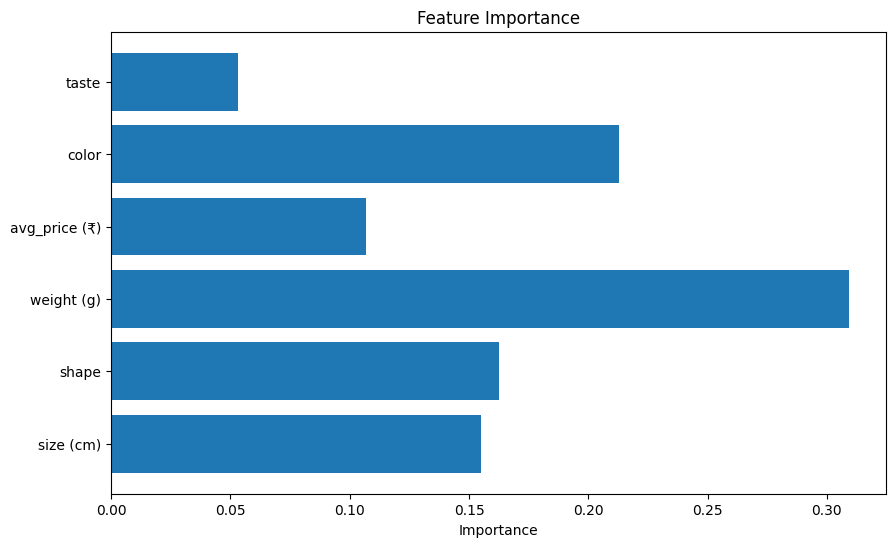

In [ ]:
# Feature Importance Graph (rank influence of features in learning)
importances = treemodel.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()

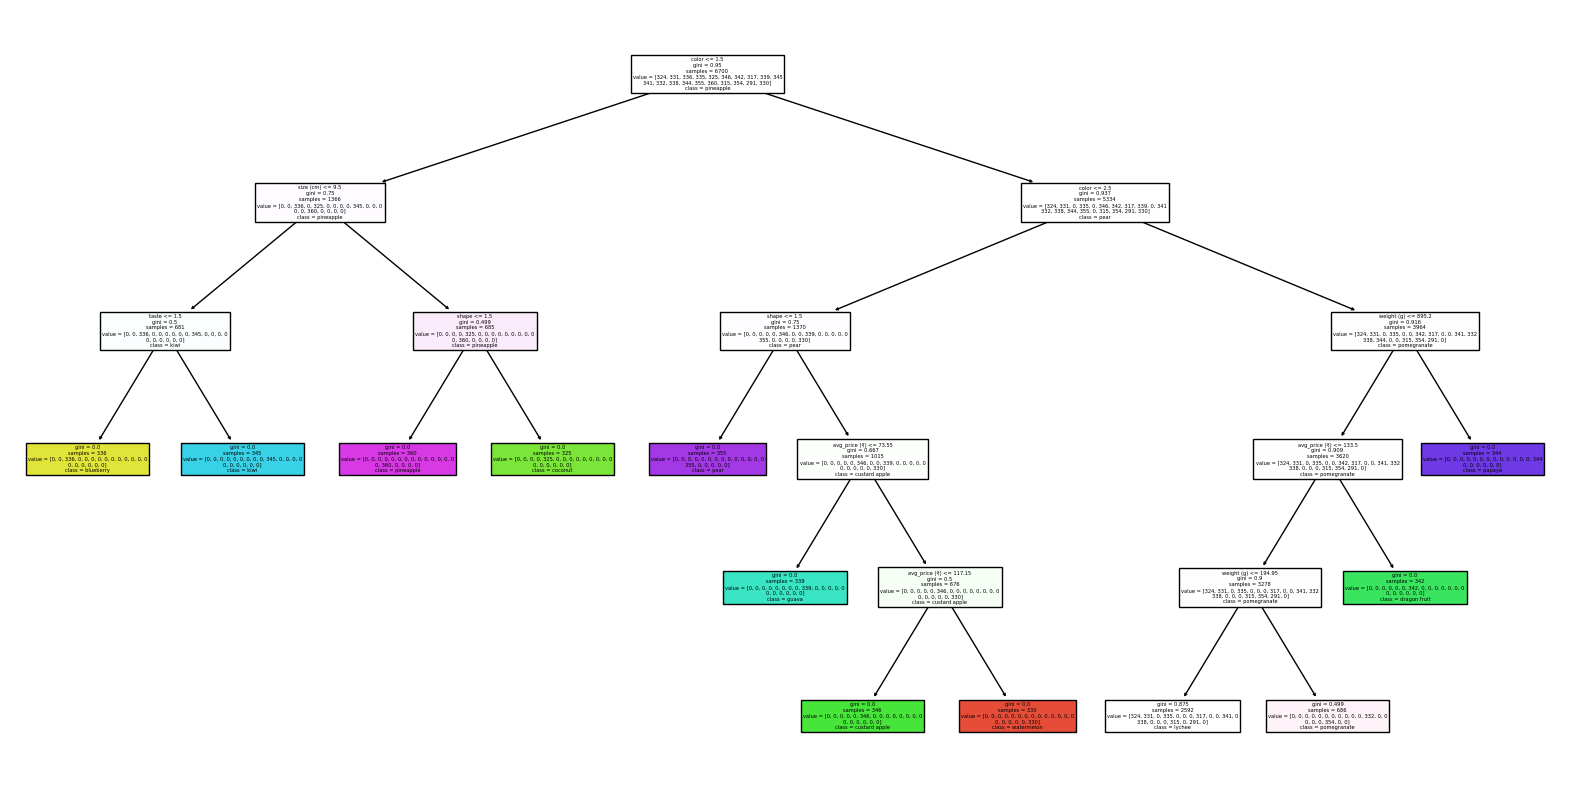

Pruned Tree Accuracy: 0.6051515151515151


In [ ]:
# Create a new, simpler tree(pruned tree, with only 5 max depth)
pruned_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
pruned_tree.fit(X_train, Y_train)


plt.figure(figsize=(20,10))
tree.plot_tree(pruned_tree, filled=True, feature_names=X.columns, class_names=target_le.classes_)
plt.show()

# check its accuracy
pruned_pred = pruned_tree.predict(X_test)
print(f"Pruned Tree Accuracy: {accuracy_score(pruned_pred, Y_test)}")

In [28]:
import pickle

# save trained model
with open('treemodel.pkl', 'wb') as file:
    pickle.dump(treemodel, file)

# load model
with open('treemodel.pkl', 'rb') as file:
    loaded_model = pickle.load(file)